<a href="https://colab.research.google.com/github/DivishaBisht/ml-beginning/blob/master/sharksordolphins_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *



In [0]:
folder = 'shark'
file = 'sharks.txt'

In [0]:
folder = 'dolphins'
file = 'dolphins.txt'

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/data/'

Mounted at /content/gdrive


In [0]:
path = Path(base_dir)
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/dolphins.txt'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/sharks.txt'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/shark'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/dolphins')]

In [0]:
classes = ['shark','dolphins']

In [0]:
download_images(path/file, dest, max_pics=200)

Error https://www.charlotteobserver.com/latest-news/s5rh39/picture229168284/alternates/FREE_1140/sharkvomit.png HTTPSConnectionPool(host='www.charlotteobserver.com', port=443): Read timed out. (read timeout=4)


In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

shark


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai-v3/data/shark/00000023.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai-v3/data/shark/00000028.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai-v3/data/shark/00000058.png'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


dolphins


cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai-v3/data/dolphins/00000044.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai-v3/data/dolphins/00000064.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai-v3/data/dolphins/00000070.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai-v3/data/dolphins/00000096.jpg'>


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes


['dolphins', 'shark']

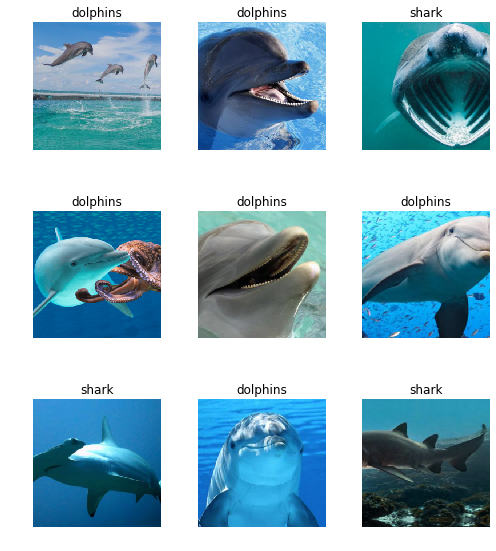

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['dolphins', 'shark'], 2, 148, 37)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:03, 22014524.11it/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.051609,0.680007,0.486486,00:03
1,0.781071,0.293971,0.108108,00:03
2,0.621372,0.229594,0.108108,00:03
3,0.505913,0.223607,0.135135,00:03


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


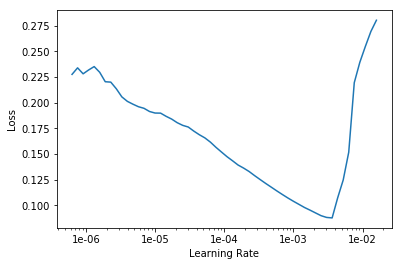

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.070639,0.179018,0.054054,00:03
1,0.050709,0.170597,0.054054,00:03


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

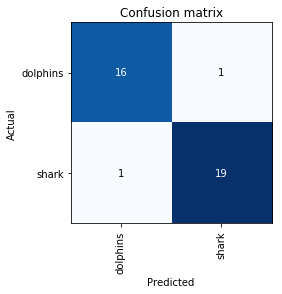

In [0]:
interp.plot_confusion_matrix()

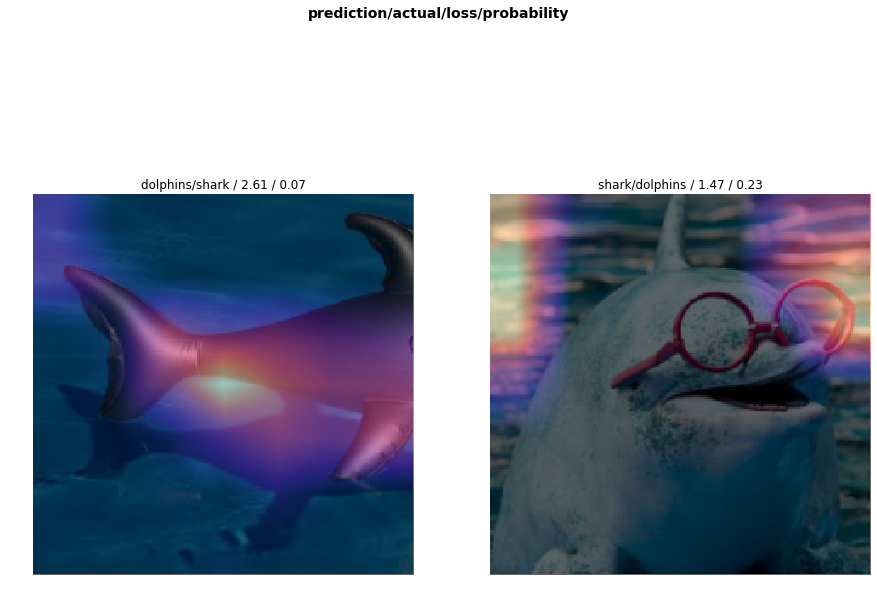

In [0]:
interp.plot_top_losses(2, figsize=(15,11))